In [90]:
using SeisPlot, SeisProcessing, SeisMain, PyPlot, LinearAlgebra
using FFTW, Random, StatsBase, SparseArrays, Interpolations
include("functionABC.jl")

functionABC (generic function with 1 method)

In [91]:
function TraceNormalize(IN::Array{Float32,2},norm::String="amp")

    OUT = zeros(size(IN));
    
    if norm == "amp"
        for i in 1:nr
            # Extract i-th trace
            aux = IN[:,i]

            # Maximum abs in time-space
            amax = maximum(abs.(aux))

            # normalization
            OUT[:,i] = IN[:,i] ./ amax
        end
    end

    if norm == "rms"
        for i in 1:nr
            # Extract i-th trace
            aux = IN[:,i]

            # Maximum abs in time-space
            amax = sqrt(sum(aux.^2)/nt)

            # normalization
            OUT[:,i] = IN[:,i] ./ amax
        end
    end
    
    return OUT;
end

function TraceNormalize(IN::Array{Float64,2},norm::String="amp")

    OUT = zeros(size(IN));
    
    if norm == "amp"
        for i in 1:nr
            # Extract i-th trace
            aux = IN[:,i]

            # Maximum abs in time-space
            amax = maximum(abs.(aux))

            # normalization
            OUT[:,i] = IN[:,i] ./ amax
        end
    end

    if norm == "rms"
        for i in 1:nr
            # Extract i-th trace
            aux = IN[:,i]

            # Maximum abs in time-space
            amax = sqrt(sum(aux.^2)/nt)

            # normalization
            OUT[:,i] = IN[:,i] ./ amax
        end
    end
    
    return OUT;
end

TraceNormalize (generic function with 4 methods)

In [92]:
# Load clean data
filename = "Ux_data_g"
nt = 3000; nr = 381; dt = 1e-3
ux_g = functionABC(filename,"r";n=(nt,nr))
ux_g = reshape(ux_g,(nt,nr));

filename = "Uz_data_g"
nt = 3000; nr = 381; dt = 1e-3
uz_g = functionABC(filename,"r";n=(nt,nr))
uz_g = reshape(uz_g,(nt,nr));

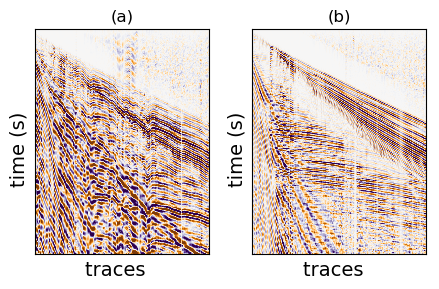

In [93]:
tmp = [ux_g uz_g]
a = maximum(tmp[:])*0.3

figure("RawData",figsize=(4.5,3))

    subplot(1,2,1)
        SeisPlotTX(ux_g,
                   fignum="RawData",
                   vmin=-a,
                   vmax=a, 
                   xlabel="traces",
                   ylabel="time (s)");
        xticks([]); yticks([])
        title("(a)")

    subplot(1,2,2)
        SeisPlotTX(uz_g,
                   fignum="RawData",
                   vmin=-a,
                   vmax=a,     
                   xlabel="traces",
                   ylabel="time (s)");
        xticks([]); yticks([])
        title("(b)")

    tight_layout();
    savefig("./Figures/RawData.pdf")

In [94]:
#=
figure("AmpSpec",figsize=(10,5))

    subplot(1,2,1)
        SeisPlotAmplitude(ux_g,60,dt,
                   fignum="AmpSpec",
                   xlabel="Amplitude",
                   ylabel="f (Hz)");
        #xticks([]);
        yticks([]);
        title("(a) Horizontal component")

    subplot(1,2,2)
        SeisPlotAmplitude(uz_g,60,dt,
                   fignum="AmpSpec",
                   xlabel="Amplitude",
                   ylabel="f (Hz)");
        #xticks([]);
        yticks([]);
        title("(b) Vertical component")

    tight_layout();
=#

In [95]:
# Load clean data
filename = "Gx_scalar"
nt = 3000; nr = 381; dt = 1e-3
gx_s = functionABC(filename,"r";n=(nt,nr))
gx_s = reshape(gx_s,(nt,nr));

filename = "Gz_scalar"
nt = 3000; nr = 381; dt = 1e-3
gz_s = functionABC(filename,"r";n=(nt,nr))
gz_s = reshape(gz_s,(nt,nr));

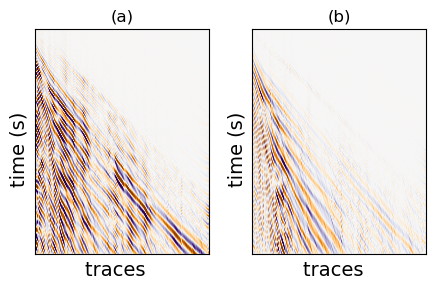

In [96]:
tmp = [ux_g uz_g]
a = maximum(tmp[:])*0.3

figure("GroundRollScalar",figsize=(4.5,3))

    subplot(1,2,1)
        SeisPlotTX(gx_s,
                   fignum="GroundRollScalar",
                   vmin=-a,
                   vmax=a, 
                   xlabel="traces",
                   ylabel="time (s)");
        xticks([]); yticks([])
        title("(a)")

    subplot(1,2,2)
        SeisPlotTX(gz_s,
                   fignum="GroundRollScalar",
                   vmin=-a,
                   vmax=a,     
                   xlabel="traces",
                   ylabel="time (s)");
        xticks([]); yticks([])
        title("(b)")

    tight_layout();
    savefig("./Figures/ScalarGround.pdf")

In [97]:
dx = ux_g - gx_s;
dxp = TraceNormalize(dx,"amp");
dz = uz_g - gz_s;
dzp = TraceNormalize(dz,"amp");

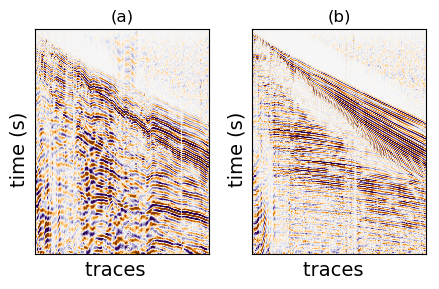

In [98]:
tmp = [ux_g uz_g]
a = maximum(tmp[:])*0.5


figure("ScalarSub",figsize=(4.5,3))

    subplot(1,2,1)
        SeisPlotTX(dxp,
                   fignum="ScalarSub",
                   vmin=-a,
                   vmax=a, 
                   xlabel="traces",
                   ylabel="time (s)");
        xticks([]); yticks([])
        title("(a)")

    subplot(1,2,2)
        SeisPlotTX(dzp,
                   fignum="ScalarSub",
                   vmin=-a,
                   vmax=a,     
                   xlabel="traces",
                   ylabel="time (s)");
        xticks([]); yticks([])
        title("(b)")

    tight_layout();
    savefig("./Figures/ScalarData.pdf")

In [99]:
#=
figure("AmpSpec",figsize=(10,5))

    subplot(1,2,1)
        SeisPlotAmplitude(dx,60,dt,
                   fignum="AmpSpec",
                   xlabel="Amplitude",
                   ylabel="f (Hz)");
        #xticks([]);
        yticks([]);
        title("(a) Horizontal component")

    subplot(1,2,2)
        SeisPlotAmplitude(dz,60,dt,
                   fignum="AmpSpec",
                   xlabel="Amplitude",
                   ylabel="f (Hz)");
        #xticks([]);
        yticks([]);
        title("(b) Vertical component")

    tight_layout();
=#

In [100]:
# Load clean data
filename = "Gx_quat"
nt = 3000; nr = 381; dt = 1e-3
gx_q = functionABC(filename,"r";n=(nt,nr))
gx_q = reshape(gx_q,(nt,nr));

filename = "Gz_quat"
nt = 3000; nr = 381; dt = 1e-3
gz_q = functionABC(filename,"r";n=(nt,nr))
gz_q = reshape(gz_q,(nt,nr));

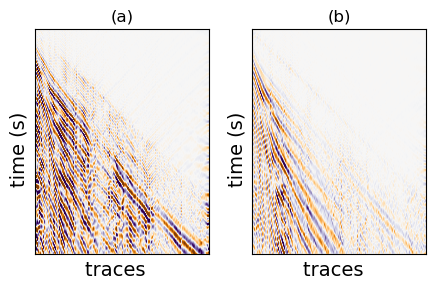

In [101]:
tmp = [ux_g uz_g]
a = maximum(tmp[:])*0.3


figure("GroundRollQuater",figsize=(4.5,3))

    subplot(1,2,1)
        SeisPlotTX(gx_q,
                   fignum="GroundRollQuater",
                   vmin=-a,
                   vmax=a, 
                   xlabel="traces",
                   ylabel="time (s)");
        xticks([]); yticks([])
        title("(a)")

    subplot(1,2,2)
        SeisPlotTX(gz_q,
                   fignum="GroundRollQuater",
                   vmin=-a,
                   vmax=a,     
                   xlabel="traces",
                   ylabel="time (s)");
        xticks([]); yticks([])
        title("(b)")

    tight_layout();
    savefig("./Figures/QuaterGround.pdf")

In [102]:
dx2 = ux_g - gx_q;
dxp = TraceNormalize(dx2,"rms");
dz2 = uz_g - gz_q;
dzp = TraceNormalize(dz2,"rms");

In [103]:
#=
figure("AmpSpec",figsize=(10,5))

    subplot(1,2,1)
        SeisPlotAmplitude(dx2,60,dt,
                   fignum="AmpSpec",
                   xlabel="Amplitude",
                   ylabel="f (Hz)");
        #xticks([]);
        yticks([]);
        title("(a) Horizontal component")

    subplot(1,2,2)
        SeisPlotAmplitude(dz2,60,dt,
                   fignum="AmpSpec",
                   xlabel="Amplitude",
                   ylabel="f (Hz)");
        #xticks([]);
        yticks([]);
        title("(b) Vertical component")

    tight_layout();
=#

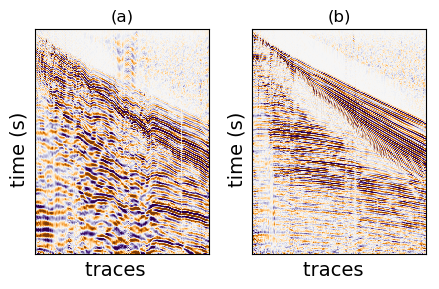

In [104]:
tmp = [ux_g uz_g]
a = maximum(tmp[:])*1.6


figure("QuaterSub",figsize=(4.5,3))

    subplot(1,2,1)
        SeisPlotTX(dxp,
                   fignum="QuaterSub",
                   vmin=-a,
                   vmax=a, 
                   xlabel="traces",
                   ylabel="time (s)");
        xticks([]); yticks([])
        title("(a)")

    subplot(1,2,2)
        SeisPlotTX(dzp,
                   fignum="QuaterSub",
                   vmin=-a,
                   vmax=a,     
                   xlabel="traces",
                   ylabel="time (s)");
        xticks([]); yticks([])
        title("(b)")

    tight_layout();
    savefig("./Figures/QuaterData.pdf")

In [105]:
 ux = ux_g[:,1:60];  uz = uz_g[:,1:60];
dxt = dx[:,1:60];  dxt2 = dx2[:,1:60];
dzt = dz[:,1:60];  dzt2 = dz2[:,1:60];

In [106]:
# Load clean data
filename = "WindowOutH"
nt = 3000; nr = 60; dt = 1e-3
win_gsx = functionABC(filename,"r";n=(nt,nr))
win_gsx = reshape(win_gsx,(nt,nr));

filename = "WindowOutV"
nt = 3000; nr = 60; dt = 1e-3
win_gsz = functionABC(filename,"r";n=(nt,nr))
win_gsz = reshape(win_gsz,(nt,nr));

In [107]:
# Load clean data
filename = "WindowOutHQ"
nt = 3000; nr = 60; dt = 1e-3
win_gqx = functionABC(filename,"r";n=(nt,nr))
win_gqx = reshape(win_gqx,(nt,nr));

filename = "WindowOutVQ"
nt = 3000; nr = 60; dt = 1e-3
win_gqz = functionABC(filename,"r";n=(nt,nr))
win_gqz = reshape(win_gqz,(nt,nr));

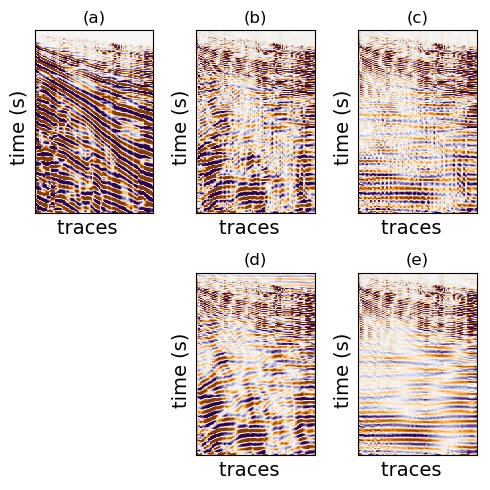

In [108]:
tmp = ux
a = maximum(tmp[:])*0.15

figure("WindowHor",figsize=(5,5))

    subplot(2,3,1)
        SeisPlotTX(ux,
                   fignum="WindowHor",
                   vmin=-1.4a,
                   vmax=1.4a, 
                   xlabel="traces",
                   ylabel="time (s)");
        xticks([]); yticks([])
        title("(a)")

    subplot(2,3,2)
        SeisPlotTX(dxt,
                   fignum="WindowHor",
                   vmin=-a,
                   vmax=a,     
                   xlabel="traces",
                   ylabel="time (s)");
        xticks([]); yticks([])
        title("(b)")

    subplot(2,3,3)
        SeisPlotTX(dxt2,
                   fignum="WindowHor",
                   vmin=-a,
                   vmax=a,     
                   xlabel="traces",
                   ylabel="time (s)");
        xticks([]); yticks([])
        title("(c)")

    subplot(2,3,5)
        SeisPlotTX(dxt-win_gsx,
                   fignum="WindowHor",
                   vmin=-a,
                   vmax=a,     
                   xlabel="traces",
                   ylabel="time (s)");
        xticks([]); yticks([])
        title("(d)")

    subplot(2,3,6)
        SeisPlotTX(dxt2-win_gqx,
                   fignum="WindowHor",
                   vmin=-a,
                   vmax=a,     
                   xlabel="traces",
                   ylabel="time (s)");
        xticks([]); yticks([])
        title("(e)")

    tight_layout();
    savefig("./Figures/WindowHor.pdf")

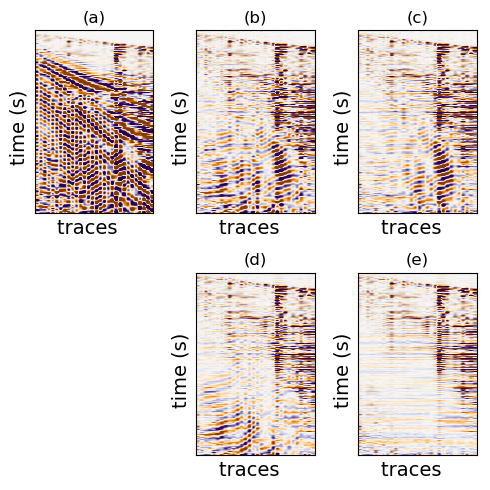

In [114]:
tmp = uz
a = maximum(tmp[:])*0.15

figure("WindowVer",figsize=(5,5))

    subplot(2,3,1)
        SeisPlotTX(uz,
                   fignum="WindowVer",
                   vmin=-1.3a,
                   vmax=1.3a, 
                   xlabel="traces",
                   ylabel="time (s)");
        xticks([]); yticks([])
        title("(a)")

    subplot(2,3,2)
        SeisPlotTX(dzt,
                   fignum="WindowVer",
                   vmin=-a,
                   vmax=a,     
                   xlabel="traces",
                   ylabel="time (s)");
        xticks([]); yticks([])
        title("(b)")

    subplot(2,3,3)
        SeisPlotTX(dzt2,
                   fignum="WindowVer",
                   vmin=-a,
                   vmax=a,     
                   xlabel="traces",
                   ylabel="time (s)");
        xticks([]); yticks([])
        title("(c)")

    subplot(2,3,5)
        SeisPlotTX(dzt-win_gsz,
                   fignum="WindowVer",
                   vmin=-a,
                   vmax=a,     
                   xlabel="traces",
                   ylabel="time (s)");
        xticks([]); yticks([])
        title("(d)")

    subplot(2,3,6)
        SeisPlotTX(dzt2-win_gqz,
                   fignum="WindowVer",
                   vmin=-a,
                   vmax=a,     
                   xlabel="traces",
                   ylabel="time (s)");
        xticks([]); yticks([])
        title("(e)")

    tight_layout();
    savefig("./Figures/WindowVer.pdf")